# In troduction to Regression with Neural Networks in TensorFlow

There are many definiions for a regression problem but in our case, we're going to simplify it :   
predicting a numerical variable based on some other combination of variables, even shorter.. predicting a number

In [1]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

In [4]:
# Create Labels

y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

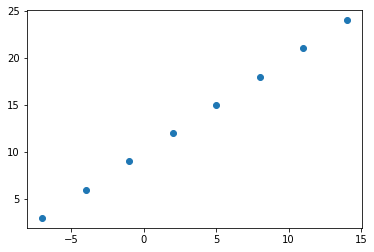

In [5]:
# Visualize

plt.scatter(X,y)

In [6]:
y ==  X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [7]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [8]:
X[0],y[0]

(-7.0, 3.0)

In [9]:
X[1],y[1]

(-4.0, 6.0)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

### As our X and y data are scalar data so it should not have shape

In [11]:
X[0].ndim

0

In [12]:
X[0],y[0]

(-7.0, 3.0)

In [13]:
# Turn our Numpy to tensors with dtype float32

X = tf.cast(tf.constant(X),dtype = tf.float32)
y = tf.cast(tf.constant(y),dtype = tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

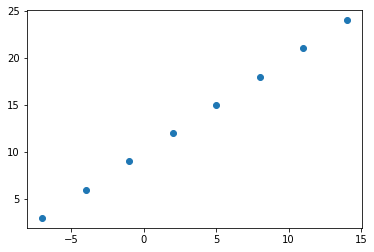

In [15]:
plt.scatter(X,y)

## Steps in modeling with TensorFlow


1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.

2. Compiling a model - define the loss function (in others wors, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model.)


3. Fitting a model - letting the model try to find patterns between X & y (features and labels)

In [16]:
# Set random seed

tf.random.set_seed(42)


# 1. Create a model using the Sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
   #  tf.keras.layers.Dense(1)
    
])

# 2. Complie the model

model.compile(loss =tf.keras.losses.mae, # mae is mean absolute error
             optimizer =tf.keras.optimizers.SGD(),
             metrics = ["mae"])  # SGD stochastic gradient descent


# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) 



Epoch 1/5
1/1 [==============================] - 0s 244ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 1ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 1ms/step - loss: 10.9748 - mae: 10.9748


In [17]:
# Check out X an y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
# Try to make a prediction

y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [19]:
y_pred + 11

array([[23.71602]], dtype=float32)

# Improve our model

1. **Creating a model** - we might add more layers, increase the number of hidden units (all called neurons)
    within each of the hidden layers, change the activation function of each layer.
    
2. **Compiling a model** - here we might change the optimization fuction or perhabs the  **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [20]:
# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ["mae"])

# 3. Fit the model (this time we'll train for longer)

model.fit(tf.expand_dims(X,axis=-1),y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 155ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 1000us/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 1000us/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 1000us/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================

1/1 [==============================] - 0s 2ms/step - loss: 6.9544 - mae: 6.9544
Epoch 89/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9488 - mae: 6.9488
Epoch 90/100
1/1 [==============================] - 0s 1000us/step - loss: 6.9431 - mae: 6.9431
Epoch 91/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9375 - mae: 6.9375
Epoch 92/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9319 - mae: 6.9319
Epoch 93/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9263 - mae: 6.9263
Epoch 94/100
1/1 [==============================] - 0s 1ms/step - loss: 6.9206 - mae: 6.9206
Epoch 95/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9150 - mae: 6.9150
Epoch 96/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9094 - mae: 6.9094
Epoch 97/100
1/1 [==============================] - 0s 1ms/step - loss: 6.9038 - mae: 6.9038
Epoch 98/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8981 -

In [21]:
# Remind the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [22]:
# Check the improvement

model.predict([17.0])

array([[29.739855]], dtype=float32)

In [23]:
# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(), # Change into Adam optimizer
             metrics = ["mae"])

# 3. Fit the model (this time we'll train for longer)

model.fit(tf.expand_dims(X,axis=-1),y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 210ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 3.7416 - mae: 3.7416
Epoch 89/100
1/1 [==============================] - 0s 2ms/step - loss: 3.7013 - mae: 3.7013
Epoch 90/100
1/1 [==============================] - 0s 2ms/step - loss: 3.7505 - mae: 3.7505
Epoch 91/100
1/1 [==============================] - 0s 999us/step - loss: 3.6921 - mae: 3.6921
Epoch 92/100
1/1 [==============================] - 0s 2ms/step - loss: 3.7522 - mae: 3.7522
Epoch 93/100
1/1 [==============================] - 0s 1ms/step - loss: 3.7016 - mae: 3.7016
Epoch 94/100
1/1 [==============================] - 0s 2ms/step - loss: 3.7251 - mae: 3.7251
Epoch 95/100
1/1 [==============================] - 0s 1ms/step - loss: 3.7105 - mae: 3.7105
Epoch 96/100
1/1 [==============================] - 0s 2ms/step - loss: 3.6979 - mae: 3.6979
Epoch 97/100
1/1 [==============================] - 0s 1ms/step - loss: 3.7194 - mae: 3.7194
Epoch 98/100
1/1 [==============================] - 0s 2ms/step - loss: 3.6705 - 

In [24]:
# Check the imrovement
model.predict([17.0])

array([[31.223137]], dtype=float32)

**Because it overfitted itself with too small dataset we have**   
**So when it trains with new X data it will just go back to the original dataset and relates the result with them.**

# changing Learning Rate would be the most important thing to do

In [25]:
# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation = "relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(lr = 0.01), # Change into Adam optimizer
             metrics = ["mae"])

# 3. Fit the model (this time we'll train for longer)

model.fit(tf.expand_dims(X,axis=-1),y,epochs = 100)

Epoch 1/100


C:\Users\Younghun\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 224ms/step - loss: 12.1456 - mae: 12.1456
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.5103 - mae: 11.5103
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.8437 - mae: 10.8437
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 10.1742 - mae: 10.1742
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 9.4974 - mae: 9.4974
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 8.8133 - mae: 8.8133
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 8.1158 - mae: 8.1158
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 7.5205 - mae: 7.5205
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 6.9200 - mae: 6.9200
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3055 - mae: 6.3055
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 5.6773 - 

1/1 [==============================] - 0s 2ms/step - loss: 0.4968 - mae: 0.4968
Epoch 90/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4547 - mae: 0.4547
Epoch 91/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4207 - mae: 0.4207
Epoch 92/100
1/1 [==============================] - 0s 1ms/step - loss: 0.3563 - mae: 0.3563
Epoch 93/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3534 - mae: 0.3534
Epoch 94/100
1/1 [==============================] - 0s 1ms/step - loss: 0.4223 - mae: 0.4223
Epoch 95/100
1/1 [==============================] - 0s 1ms/step - loss: 0.3232 - mae: 0.3232
Epoch 96/100
1/1 [==============================] - 0s 1000us/step - loss: 0.3940 - mae: 0.3940
Epoch 97/100
1/1 [==============================] - 0s 1ms/step - loss: 0.3280 - mae: 0.3280
Epoch 98/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3486 - mae: 0.3486
Epoch 99/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2989 -

In [26]:
# Check the improvement

model.predict([17.0])

array([[26.921333]], dtype=float32)

# Evaluting a model

In practice, a typical workflow you'll go through when building neural networks is:


```
Build a model -> Fit it -> evaluate it -> tweak a model -> fit it -> evaluate-> tweak it...
```

# When it comes to evaluation There are 3 words to Memorize:

#  > Visualize, Visualize, Visualize
It's a good idea to visualize

 * The data - what data are we working with? What does it look like?
 
 * The model itself - What does our model look like?
 
 * The training of a model = how does a model perform while it learns?
 
 * The predictions of the model - how do the predictions of a model line up against the ground truth (the original label)?

In [27]:
# Make a bigger dataset

X  = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [28]:
# Make labels for the dataset


y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

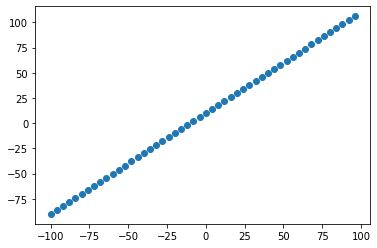

In [29]:
# Visualize the data

import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets... 

* Training set - the model learns from this data, which is typically 70-80% total data available
* Validation - the model gets tuned on this data, which is typically 10-15% of the data available
* Test set - the model gets evaluate on this data to test what it has learned, this set is typically 10-15% of the total data available

In [30]:
# Check the length of how many samples

len(X)

50

In [31]:
# Split data into train and test sets

X_train = X[:40] # first 40 ar training samples ( 80%)
y_train =y[:40]
X_test = X[40:] # last 10 are testing samples (20%)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

# Visualize Data

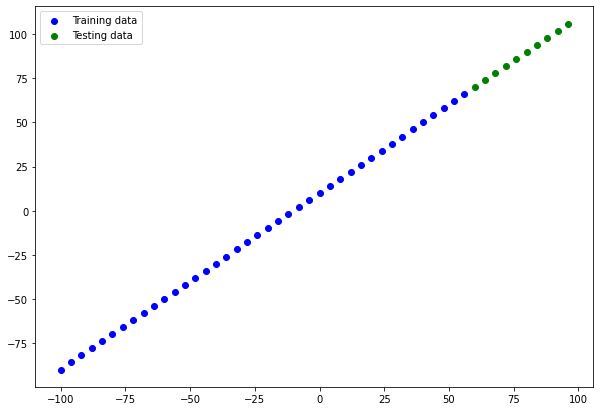

In [32]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train,y_train,c ="b",label = "Training data")
# Plot test data in green

plt.scatter(X_test,y_test,c="g",label ="Testing data")

# show a legend
plt.legend()

In [33]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model

model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics= ["mae"])

# Fit the model

# model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs =100)

In [34]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [45]:
# Let's craete a model which builds automatically  by defining the input_shape arguments

tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name = "input_layer"),
    tf.keras.layers.Dense(1,name = "output_layer")
], name = "model1")

# Compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ['mae'])



In [46]:
model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - these are parameters (patterns_ the model can update as it trains
* Non-trainable params - these parameters aren't updated during training ( this is typical when you brin in already learn patterns or parameters from other **transfer learning**.

**Resource** : **For a more in depth overview of the trainable parameters whihin a layer, check out MIT's introduction to deep learning video**

In [47]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs =100,verbose = 0)

In [48]:
# Get a summary of our model

model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


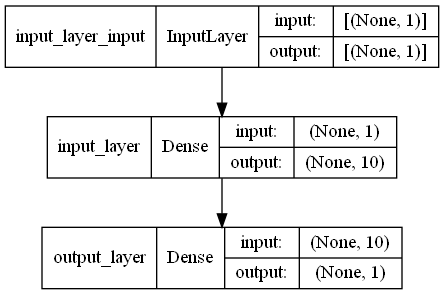

In [49]:
from tensorflow.keras.utils import plot_model

plot_model(model = model,show_shapes = True)

## Visualizing our model's Prediction

To visualize predictions , it's good idea to plot them against the ground truth labels.

Often you'll see this in the form of 'y_test' or 'y_true' versus `y_pred`(ground truth versus model)

In [51]:
# MAke some predictions

y_pred = model.predict(X_test)
y_pred

array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

In [52]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

**Note :** Feel like to reuse some kind of functionality in the future, it's good idea to turn into a function

In [103]:
# Let's create a plotting function

def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = y_pred):
    
    """
    Plots training data, test data and compares predictions to ground truth labels
    """
    
    plt.figure(figsize = (10,7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c ="b",label="Training data")
    
    # Plot testing data in green
    plt.scatter(test_data,test_labels,c = "g",label = "Testing data")
    
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c= "r", label = "Predictions")
    
    # Show legends
    plt.legend()

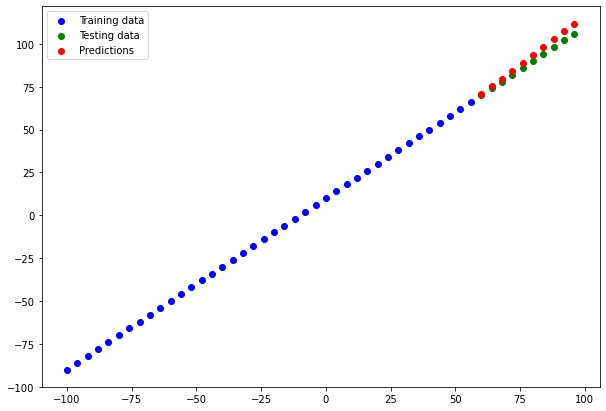

In [104]:
plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = y_pred)

# Evaluating our model's predictions with regression evaluation metrics

Depending on the problem working on, there will be different evalutaion metrics to evalutate model's performance.


Since working on a regression, two of the main metrics:

* MAE - mean absolute error, "on average how wrong is each of model's predictions"
* MSE - mean squared error, "square the average errors"

In [105]:
# Evaluate the model on the test

model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 34ms/step - loss: 3.1969 - mae: 3.1969


[3.1969382762908936, 3.1969382762908936]

In [106]:
# Calculate the mean absolute error


mae = tf.metrics.mean_absolute_error(y_true = y_test,y_pred = tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558252 , 14.1160555, 11.708944 , 10.336931 , 10.       ,
       10.698161 , 12.447113 , 15.332995 , 19.253975 , 23.84169  ],
      dtype=float32)>

In [107]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)>

In [108]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [109]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.552185,  75.13991 ,  79.72764 ,  84.315346,  88.90308 ,
        93.49081 ,  98.07852 , 102.666245, 107.253975, 111.84169 ],
      dtype=float32)>

In [110]:
# Calculate the mean absolute error


mae = tf.metrics.mean_absolute_error(y_true = y_test,y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

In [111]:
# Calculate the mean squared error

mse = tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

In [112]:
# Make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true = y_true,
                                         y_pred = tf.squeeze(y_pred))


def mse(y_true,y_pred):
    return tf.metrics.mean_squared_error(y_true = y_true,
                                        y_pred = tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate -> tweak ,,,,
```


1. Get more data - get more examples for your model to train on ( more opportunities to learn patterns or relationships between features and labels.)

2. Make model larger (using a more complex model) -  might come in the form of more layers or more hidden units in each layer.

3. Train for longer - more epochs, more of a chance to find patterns in data



 

# Do 3 modelling experiments:

1. `model1` - same as the original model, 1layer, trained for 100 epochs.

2. `model2` - 2 lyers, trained for 100 epochs

3. `model3` - 2 layers, trained for 500 epochs

## Build model1

In [113]:
X_train, y_train

# Set random seed
tf.random.set_seed(42)



In [114]:

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 1000us/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 1000us/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 1000us/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 100

2/2 [==============================] - 0s 2ms/step - loss: 12.0209 - mae: 12.0209
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 10.6389 - mae: 10.6389
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 7.2667 - mae: 7.2667
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 12.7786 - mae: 12.7786
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 7.3481 - mae: 7.3481
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 7.7175 - mae: 7.7175
Epoch 93/100
2/2 [==============================] - 0s 1ms/step - loss: 7.1263 - mae: 7.1263
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 12.6190 - mae: 12.6190
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 10.0912 - mae: 10.0912
Epoch 96/100
2/2 [==============================] - 0s 1000us/step - loss: 9.3558 - mae: 9.3558
Epoch 97/100
2/2 [==============================] - 0s 1ms/step - loss

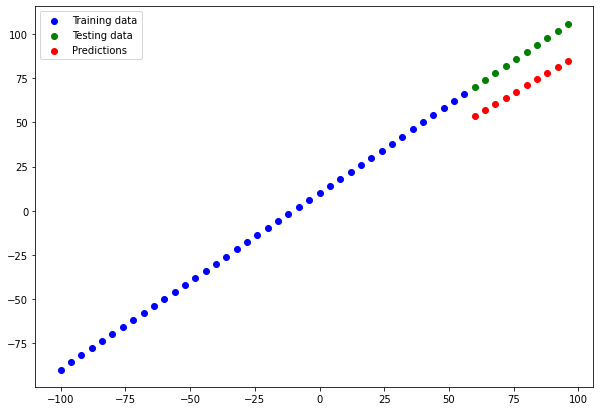

In [115]:
# Make and plot for predictions for model1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [116]:
# Calculate model1 evaluation metrics

mae_1 = mae(y_test,y_pred_1)
mse_1 = mse(y_test,y_pred_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

# Build model_2

* 2 Dense layers, trained for 100 epochs

In [117]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics= ["mae"])

model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 48.4329 - mae: 48.4329
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 31.3826 - mae: 31.3826
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 36.2157 - mae: 36.2157
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 28.3086 - mae: 28.3086
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 15.3864 - mae: 15.3864
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 12.2199 - mae: 12.2199
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 11.5217 - mae: 11.5217
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 11.2331 - mae: 11.2331
Epoch 9/100
2/2 [==============================] - 0s 1000us/step - loss: 42.0800 - mae: 42.0800
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 29.2675 - mae: 29.2675
Epoch 11/100
2/2 [==============================] - 0s 1

2/2 [==============================] - 0s 1000us/step - loss: 11.2153 - mae: 11.2153
Epoch 88/100
2/2 [==============================] - 0s 1ms/step - loss: 25.9418 - mae: 25.9418
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 9.5223 - mae: 9.5223
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 18.2501 - mae: 18.2501
Epoch 91/100
2/2 [==============================] - 0s 1ms/step - loss: 10.3258 - mae: 10.3258
Epoch 92/100
2/2 [==============================] - 0s 999us/step - loss: 17.5002 - mae: 17.5002
Epoch 93/100
2/2 [==============================] - 0s 1ms/step - loss: 6.8259 - mae: 6.8259
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 17.6564 - mae: 17.6564
Epoch 95/100
2/2 [==============================] - 0s 1ms/step - loss: 17.3717 - mae: 17.3717
Epoch 96/100
2/2 [==============================] - 0s 2ms/step - loss: 11.5390 - mae: 11.5390
Epoch 97/100
2/2 [==============================] - 0s 1000us/

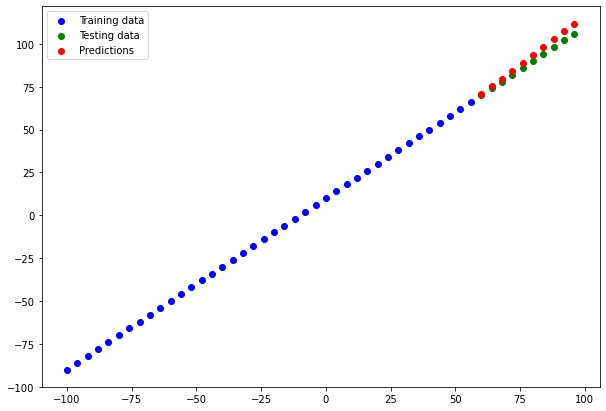

In [102]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions= y_pred_2)

In [118]:
# Calculate model_2 evaluation

mae_2 = mae(y_test,y_pred_2)
mse_2 = mse(y_test,y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.0013146>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.922986>)

# Build model 3
**Change the epochs to 500**

In [120]:
# Build model 3

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])

model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs =500)

Epoch 1/500
2/2 [==============================] - 0s 1000us/step - loss: 40.0927 - mae: 40.0927
Epoch 2/500
2/2 [==============================] - 0s 1ms/step - loss: 31.0100 - mae: 31.0100
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 28.4922 - mae: 28.4922
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 15.8280 - mae: 15.8280
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 21.8634 - mae: 21.8634
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 11.2800 - mae: 11.2800
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 12.3414 - mae: 12.3414
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: 11.0069 - mae: 11.0069
Epoch 9/500
2/2 [==============================] - 0s 1000us/step - loss: 38.9569 - mae: 38.9569
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: 26.5451 - mae: 26.5451
Epoch 11/500
2/2 [==============================] - 0

2/2 [==============================] - 0s 2ms/step - loss: 24.3446 - mae: 24.3446
Epoch 88/500
2/2 [==============================] - 0s 1ms/step - loss: 19.0090 - mae: 19.0090
Epoch 89/500
2/2 [==============================] - 0s 1ms/step - loss: 7.1789 - mae: 7.1789
Epoch 90/500
2/2 [==============================] - 0s 1ms/step - loss: 18.2665 - mae: 18.2665
Epoch 91/500
2/2 [==============================] - 0s 999us/step - loss: 13.3192 - mae: 13.3192
Epoch 92/500
2/2 [==============================] - 0s 2ms/step - loss: 8.7323 - mae: 8.7323
Epoch 93/500
2/2 [==============================] - 0s 1000us/step - loss: 14.1831 - mae: 14.1831
Epoch 94/500
2/2 [==============================] - 0s 999us/step - loss: 17.1837 - mae: 17.1837
Epoch 95/500
2/2 [==============================] - 0s 999us/step - loss: 16.7617 - mae: 16.7617
Epoch 96/500
2/2 [==============================] - 0s 3ms/step - loss: 11.1266 - mae: 11.1266
Epoch 97/500
2/2 [==============================] - 0s 1ms

2/2 [==============================] - 0s 1ms/step - loss: 13.8816 - mae: 13.8816
Epoch 173/500
2/2 [==============================] - 0s 2ms/step - loss: 22.5659 - mae: 22.5659
Epoch 174/500
2/2 [==============================] - 0s 1ms/step - loss: 11.3741 - mae: 11.3741
Epoch 175/500
2/2 [==============================] - 0s 2ms/step - loss: 20.1287 - mae: 20.1287
Epoch 176/500
2/2 [==============================] - 0s 2ms/step - loss: 7.4299 - mae: 7.4299
Epoch 177/500
2/2 [==============================] - 0s 2ms/step - loss: 8.6148 - mae: 8.6148
Epoch 178/500
2/2 [==============================] - 0s 2ms/step - loss: 15.5251 - mae: 15.5251
Epoch 179/500
2/2 [==============================] - 0s 2ms/step - loss: 9.2799 - mae: 9.2799
Epoch 180/500
2/2 [==============================] - 0s 1ms/step - loss: 8.1461 - mae: 8.1461
Epoch 181/500
2/2 [==============================] - 0s 3ms/step - loss: 18.7608 - mae: 18.7608
Epoch 182/500
2/2 [==============================] - 0s 2ms/st

2/2 [==============================] - 0s 999us/step - loss: 10.5936 - mae: 10.5936
Epoch 258/500
2/2 [==============================] - 0s 1ms/step - loss: 14.2084 - mae: 14.2084
Epoch 259/500
2/2 [==============================] - 0s 2ms/step - loss: 11.2697 - mae: 11.2697
Epoch 260/500
2/2 [==============================] - 0s 2ms/step - loss: 31.6111 - mae: 31.6111
Epoch 261/500
2/2 [==============================] - 0s 1ms/step - loss: 11.1938 - mae: 11.1938
Epoch 262/500
2/2 [==============================] - 0s 2ms/step - loss: 10.0478 - mae: 10.0478
Epoch 263/500
2/2 [==============================] - 0s 2ms/step - loss: 8.9594 - mae: 8.9594
Epoch 264/500
2/2 [==============================] - 0s 1ms/step - loss: 21.4976 - mae: 21.4976
Epoch 265/500
2/2 [==============================] - 0s 1000us/step - loss: 11.4512 - mae: 11.4512
Epoch 266/500
2/2 [==============================] - 0s 1ms/step - loss: 13.2897 - mae: 13.2897
Epoch 267/500
2/2 [==============================] 

2/2 [==============================] - 0s 1000us/step - loss: 13.2713 - mae: 13.2713
Epoch 343/500
2/2 [==============================] - 0s 1ms/step - loss: 11.0181 - mae: 11.0181
Epoch 344/500
2/2 [==============================] - 0s 2ms/step - loss: 9.9100 - mae: 9.9100
Epoch 345/500
2/2 [==============================] - 0s 2ms/step - loss: 30.9880 - mae: 30.9880
Epoch 346/500
2/2 [==============================] - 0s 2ms/step - loss: 10.6683 - mae: 10.6683
Epoch 347/500
2/2 [==============================] - 0s 1000us/step - loss: 25.6632 - mae: 25.6632
Epoch 348/500
2/2 [==============================] - 0s 1ms/step - loss: 13.0321 - mae: 13.0321
Epoch 349/500
2/2 [==============================] - 0s 2ms/step - loss: 13.0952 - mae: 13.0952
Epoch 350/500
2/2 [==============================] - 0s 2ms/step - loss: 15.4092 - mae: 15.4092
Epoch 351/500
2/2 [==============================] - 0s 2ms/step - loss: 32.9235 - mae: 32.9235
Epoch 352/500
2/2 [==============================]

2/2 [==============================] - 0s 1ms/step - loss: 6.4344 - mae: 6.4344
Epoch 428/500
2/2 [==============================] - 0s 2ms/step - loss: 13.5165 - mae: 13.5165
Epoch 429/500
2/2 [==============================] - 0s 2ms/step - loss: 11.5002 - mae: 11.5002
Epoch 430/500
2/2 [==============================] - 0s 1ms/step - loss: 10.2537 - mae: 10.2537
Epoch 431/500
2/2 [==============================] - 0s 1000us/step - loss: 11.5421 - mae: 11.5421
Epoch 432/500
2/2 [==============================] - 0s 2ms/step - loss: 9.9476 - mae: 9.9476
Epoch 433/500
2/2 [==============================] - 0s 2ms/step - loss: 3.4855 - mae: 3.4855
Epoch 434/500
2/2 [==============================] - 0s 2ms/step - loss: 37.2906 - mae: 37.2906
Epoch 435/500
2/2 [==============================] - 0s 2ms/step - loss: 14.1289 - mae: 14.1289
Epoch 436/500
2/2 [==============================] - 0s 2ms/step - loss: 12.3347 - mae: 12.3347
Epoch 437/500
2/2 [==============================] - 0s 2

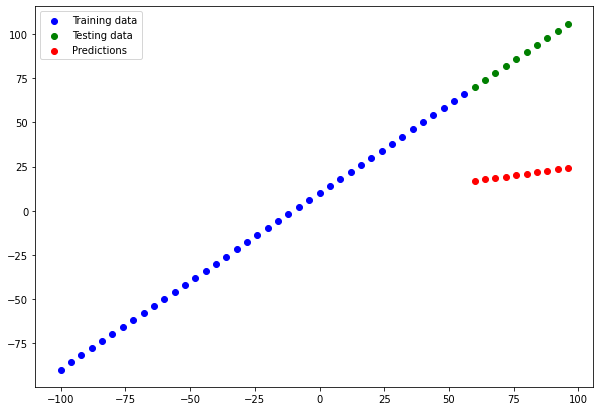

In [121]:
# Visualaztion

y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

# OverFitting!!!

In [122]:
# Evaluation

mae_3 = mae(y_test,y_pred_3)
mse_3 = mse(y_test,y_pred_3)

mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.42992>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4630.3647>)

# Comparing our Results

In [123]:
# Compare model's results using a pandas DataFrame

import pandas as pd

In [126]:
model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                ["model_2",mae_2.numpy(),mse_2.numpy()],
                ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results,columns = ["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,2.001315,5.922986
2,model_3,67.429916,4630.364746


In [127]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 100)               200       
                                                                 
 dense_18 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


**Main goal should be to minimize the time between the experiments, The more experiments, the more things will be figured out which don't work and in turn, get closer to figuring out what does work.**
# Remember the ML practioner's motto : Experiment, Experiment, Experiment

## Tracking the expeirments

One really good habit in ML modeling is to track the results of experiments.


And doing so, it can be tedious if we are running lots of experiments.

Luckily, there are tool to help

**Resource:** As to build more models, to look into using:
       
* TensorBoard - a componenet of the TensorFlow libraray to help track modelling experiments
* Weights & Biases -  a tool for tracking all of kinds of ML experiments (Plugs straight into TensorFlow)

# Saving Models

Saving models allow us to use them outside of the Notebook itself. such as in a web application or a mobile app.


There are two main formats to save model:
    
    1. The SaveModel format
    2. The HDF5 format

In [128]:
# Save model using SaveModel Format

model_2.save("Day4_Model2_SaveModel_Format")

INFO:tensorflow:Assets written to: Day4_Model2_SaveModel_Format\assets


In [130]:
# Save model using the HDF5 format

model_2.save("Day4_Model2_HDF5_Format.h5")

In [132]:
# Loading in a saved model


Loaded_SavedModel_Model = tf.keras.models.load_model("./Day4_Model2_SaveModel_Format")
Loaded_SavedModel_Model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 100)               200       
                                                                 
 dense_18 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [133]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 100)               200       
                                                                 
 dense_18 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [134]:
# Compare model_2 predictions with SavedModel format model predictions

model_2_preds = model_2.predict(X_test)

loaded_SavedModel_format_preds = Loaded_SavedModel_Model.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# A larger example

In [136]:
# Import Required Libraries

import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt

In [138]:
# Read in insuarnce diretly from github

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [146]:
# Let's try one_hot encode our DataFrame so it's all numbers

insurance_onehot = pd.get_dummies(insurance)

In [142]:
# Create X& y values(features and labels)

# Create Training and test Sets

# Build a neural networks (sort of like model_2 above)

In [147]:
# Create X & y values
y = insurance_onehot['charges']
X = insurance_onehot.drop('charges',axis =1)

In [149]:
# Creating training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state =42)

In [151]:
# Build a model

tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.SGD(),
                       metrics = ["mae"])


insurance_model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 606us/step - loss: 8637.0996 - mae: 8637.0996
Epoch 2/100
34/34 [==============================] - 0s 636us/step - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
34/34 [==============================] - 0s 637us/step - loss: 7558.1475 - mae: 7558.1475
Epoch 4/100
34/34 [==============================] - 0s 606us/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 606us/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 606us/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 606us/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 576us/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 636us/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 606us/step - loss: 7493.1

34/34 [==============================] - 0s 758us/step - loss: 7279.3784 - mae: 7279.3784
Epoch 81/100
34/34 [==============================] - 0s 727us/step - loss: 7273.8477 - mae: 7273.8477
Epoch 82/100
34/34 [==============================] - 0s 727us/step - loss: 7176.5205 - mae: 7176.5205
Epoch 83/100
34/34 [==============================] - 0s 758us/step - loss: 7425.6289 - mae: 7425.6289
Epoch 84/100
34/34 [==============================] - 0s 667us/step - loss: 7403.1289 - mae: 7403.1289
Epoch 85/100
34/34 [==============================] - 0s 788us/step - loss: 7356.0093 - mae: 7356.0093
Epoch 86/100
34/34 [==============================] - 0s 637us/step - loss: 7484.7271 - mae: 7484.7271
Epoch 87/100
34/34 [==============================] - 0s 637us/step - loss: 7217.6079 - mae: 7217.6079
Epoch 88/100
34/34 [==============================] - 0s 637us/step - loss: 7261.0000 - mae: 7261.0000
Epoch 89/100
34/34 [==============================] - 0s 667us/step - loss: 7134.1553 

In [152]:
# Check the results of insurance model on the test data

insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 857us/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [154]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

## Right now it looks model isn't performing too well. Try to improve it

To improve model, gonna run 2 experiments : 

1. Add an extra layer with more hidden units

2. Train for longer

3. Add learning rate.

In [156]:
# Set random seed
tf.random.set_seed(42)

In [162]:
insurance_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model2.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

insurance_model2.fit(X_train,y_train,epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 0s 727us/step - loss: 13305.1455 - mae: 13305.1455
Epoch 2/100
34/34 [==============================] - 0s 697us/step - loss: 13140.1846 - mae: 13140.1846
Epoch 3/100
34/34 [==============================] - 0s 727us/step - loss: 12795.5068 - mae: 12795.5068
Epoch 4/100
34/34 [==============================] - 0s 667us/step - loss: 12116.7373 - mae: 12116.7373
Epoch 5/100
34/34 [==============================] - 0s 727us/step - loss: 10972.8496 - mae: 10972.8496
Epoch 6/100
34/34 [==============================] - 0s 727us/step - loss: 9500.0107 - mae: 9500.0107
Epoch 7/100
34/34 [==============================] - 0s 727us/step - loss: 8153.0093 - mae: 8153.0093
Epoch 8/100
34/34 [==============================] - 0s 727us/step - loss: 7510.5737 - mae: 7510.5737
Epoch 9/100
34/34 [==============================] - 0s 727us/step - loss: 7406.2988 - mae: 7406.2988
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss

34/34 [==============================] - 0s 697us/step - loss: 5846.8760 - mae: 5846.8760
Epoch 81/100
34/34 [==============================] - 0s 697us/step - loss: 5821.2178 - mae: 5821.2178
Epoch 82/100
34/34 [==============================] - 0s 818us/step - loss: 5789.9653 - mae: 5789.9653
Epoch 83/100
34/34 [==============================] - 0s 818us/step - loss: 5760.8730 - mae: 5760.8730
Epoch 84/100
34/34 [==============================] - 0s 727us/step - loss: 5725.9287 - mae: 5725.9287
Epoch 85/100
34/34 [==============================] - 0s 697us/step - loss: 5698.5562 - mae: 5698.5562
Epoch 86/100
34/34 [==============================] - 0s 697us/step - loss: 5663.7461 - mae: 5663.7461
Epoch 87/100
34/34 [==============================] - 0s 697us/step - loss: 5624.4399 - mae: 5624.4399
Epoch 88/100
34/34 [==============================] - 0s 813us/step - loss: 5587.8203 - mae: 5587.8203
Epoch 89/100
34/34 [==============================] - 0s 727us/step - loss: 5547.4019 

In [165]:
# Evaluate the larger model

insurance_model2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 625us/step - loss: 4856.5981 - mae: 4856.5981


[4856.59814453125, 4856.59814453125]

In [179]:
insurance_model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model3.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

history = insurance_model3.fit(X_train,y_train,epochs = 200)

Epoch 1/200
34/34 [==============================] - 0s 697us/step - loss: 13268.6797 - mae: 13268.6797
Epoch 2/200
34/34 [==============================] - 0s 727us/step - loss: 13080.8789 - mae: 13080.8789
Epoch 3/200
34/34 [==============================] - 0s 667us/step - loss: 12692.9014 - mae: 12692.9014
Epoch 4/200
34/34 [==============================] - 0s 788us/step - loss: 11953.6084 - mae: 11953.6084
Epoch 5/200
34/34 [==============================] - 0s 727us/step - loss: 10760.1182 - mae: 10760.1182
Epoch 6/200
34/34 [==============================] - 0s 697us/step - loss: 9303.1787 - mae: 9303.1787
Epoch 7/200
34/34 [==============================] - 0s 818us/step - loss: 8033.2671 - mae: 8033.2671
Epoch 8/200
34/34 [==============================] - 0s 697us/step - loss: 7493.6147 - mae: 7493.6147
Epoch 9/200
34/34 [==============================] - 0s 788us/step - loss: 7412.8853 - mae: 7412.8853
Epoch 10/200
34/34 [==============================] - 0s 758us/step - lo

34/34 [==============================] - 0s 909us/step - loss: 5876.6860 - mae: 5876.6860
Epoch 81/200
34/34 [==============================] - 0s 970us/step - loss: 5851.1655 - mae: 5851.1655
Epoch 82/200
34/34 [==============================] - 0s 849us/step - loss: 5822.6294 - mae: 5822.6294
Epoch 83/200
34/34 [==============================] - 0s 788us/step - loss: 5794.1997 - mae: 5794.1997
Epoch 84/200
34/34 [==============================] - 0s 868us/step - loss: 5760.2446 - mae: 5760.2446
Epoch 85/200
34/34 [==============================] - 0s 909us/step - loss: 5732.9004 - mae: 5732.9004
Epoch 86/200
34/34 [==============================] - 0s 909us/step - loss: 5699.1030 - mae: 5699.1030
Epoch 87/200
34/34 [==============================] - 0s 1ms/step - loss: 5662.2012 - mae: 5662.2012
Epoch 88/200
34/34 [==============================] - 0s 879us/step - loss: 5626.9375 - mae: 5626.9375
Epoch 89/200
34/34 [==============================] - 0s 818us/step - loss: 5588.0562 - 

34/34 [==============================] - 0s 667us/step - loss: 3727.9597 - mae: 3727.9597
Epoch 160/200
34/34 [==============================] - 0s 758us/step - loss: 3734.1602 - mae: 3734.1602
Epoch 161/200
34/34 [==============================] - 0s 727us/step - loss: 3729.4597 - mae: 3729.4597
Epoch 162/200
34/34 [==============================] - 0s 727us/step - loss: 3725.9209 - mae: 3725.9209
Epoch 163/200
34/34 [==============================] - 0s 727us/step - loss: 3723.7231 - mae: 3723.7231
Epoch 164/200
34/34 [==============================] - 0s 818us/step - loss: 3728.7864 - mae: 3728.7864
Epoch 165/200
34/34 [==============================] - 0s 758us/step - loss: 3718.6160 - mae: 3718.6160
Epoch 166/200
34/34 [==============================] - 0s 727us/step - loss: 3721.6831 - mae: 3721.6831
Epoch 167/200
34/34 [==============================] - 0s 667us/step - loss: 3719.9658 - mae: 3719.9658
Epoch 168/200
34/34 [==============================] - 0s 758us/step - loss: 3

In [180]:
# Evaluate the longer model
insurance_model3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 750us/step - loss: 3494.0046 - mae: 3494.0046


[3494.004638671875, 3494.004638671875]

Text(0.5, 0, 'epochs')

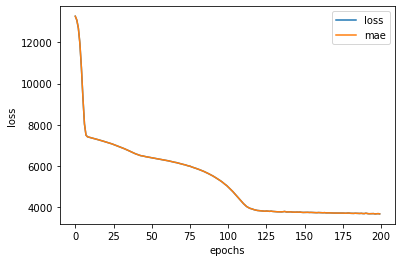

In [181]:
# Plot history (also known ans a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Question** How long should we train?


It depends on what the model is working for

However, many people asked this question before

TensorFlow has a solution. 

# tensorflow early stopping callback

which is a TensorFlow component can add to model to stop training once it stops improving certain method.

# Preprocessing data (normalization and standardization)



In terms of scaling values, neural networks tend to prefer normalization.

If not sure what to use, could try both and see which performs better

<AxesSubplot:ylabel='Frequency'>

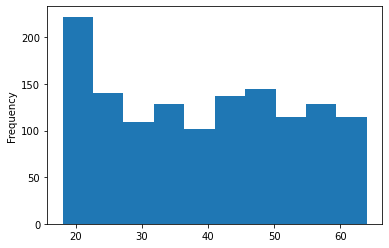

In [183]:
X["age"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

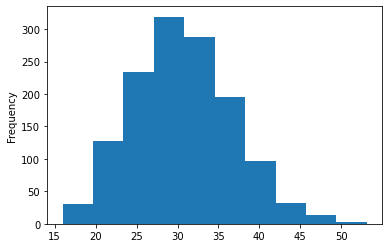

In [184]:
X["bmi"].plot(kind="hist")

In [185]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [187]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [189]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [194]:
# Create a column transformer

ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # turn all values between 0 to 1
    (OneHotEncoder(handle_unknown = "ignore"),["sex","smoker","region"])
)

# Create X & y

X = insurance.drop("charges",axis=1)

y = insurance["charges"]

# Split training test data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state =42)

# Fit the column transformer to our training data

ct.fit(X_train)

# Transform training and test data with normalization MinMaxScaler and OneHotEncoder

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [195]:
# What does our data look like
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [196]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [197]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Data has been normalized  and one hot encoded

In [200]:
# Build a neural network model to fit our data

tf.random.set_seed(42)

# Create model


insurance_model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model4.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

insurance_model4.fit(X_train_normal,y_train,epochs = 200)

Epoch 1/200
34/34 [==============================] - 0s 758us/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/200
34/34 [==============================] - 0s 727us/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/200
34/34 [==============================] - 0s 697us/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 667us/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 743us/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/200
34/34 [==============================] - 0s 788us/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/200
34/34 [==============================] - 0s 727us/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 727us/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - ETA: 0s - loss: 14551.0498 - mae: 14551.049 - 0s 697us/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34

34/34 [==============================] - 0s 727us/step - loss: 3691.8792 - mae: 3691.8792
Epoch 80/200
34/34 [==============================] - 0s 758us/step - loss: 3682.8350 - mae: 3682.8350
Epoch 81/200
34/34 [==============================] - 0s 667us/step - loss: 3676.9763 - mae: 3676.9763
Epoch 82/200
34/34 [==============================] - 0s 727us/step - loss: 3673.9495 - mae: 3673.9495
Epoch 83/200
34/34 [==============================] - 0s 758us/step - loss: 3667.8452 - mae: 3667.8452
Epoch 84/200
34/34 [==============================] - 0s 667us/step - loss: 3664.5759 - mae: 3664.5759
Epoch 85/200
34/34 [==============================] - 0s 758us/step - loss: 3661.8562 - mae: 3661.8562
Epoch 86/200
34/34 [==============================] - 0s 697us/step - loss: 3660.3049 - mae: 3660.3049
Epoch 87/200
34/34 [==============================] - 0s 727us/step - loss: 3657.5134 - mae: 3657.5134
Epoch 88/200
34/34 [==============================] - 0s 727us/step - loss: 3655.2200 

34/34 [==============================] - 0s 849us/step - loss: 3537.4109 - mae: 3537.4109
Epoch 158/200
34/34 [==============================] - 0s 879us/step - loss: 3534.4919 - mae: 3534.4919
Epoch 159/200
34/34 [==============================] - 0s 879us/step - loss: 3532.9487 - mae: 3532.9487
Epoch 160/200
34/34 [==============================] - 0s 818us/step - loss: 3532.6985 - mae: 3532.6985
Epoch 161/200
34/34 [==============================] - 0s 879us/step - loss: 3529.6245 - mae: 3529.6245
Epoch 162/200
34/34 [==============================] - 0s 788us/step - loss: 3529.0967 - mae: 3529.0967
Epoch 163/200
34/34 [==============================] - 0s 758us/step - loss: 3527.5430 - mae: 3527.5430
Epoch 164/200
34/34 [==============================] - 0s 1ms/step - loss: 3526.2844 - mae: 3526.2844
Epoch 165/200
34/34 [==============================] - 0s 970us/step - loss: 3524.1592 - mae: 3524.1592
Epoch 166/200
34/34 [==============================] - 0s 970us/step - loss: 352

In [201]:
# Evaluate our model with normalized data

insurance_model4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 625us/step - loss: 3171.5774 - mae: 3171.5774


[3171.577392578125, 3171.577392578125]